# Ahmed Abd-Elsalam Muhammed Afify

## PageRank Algorithm:

# PageRank from Scikit: Documentation
#### https://github.com/sknetwork-team/scikit-network/blob/master/docs/tutorials/ranking/pagerank.ipynb

### PageRank Algorithm 
is the algorithm used by google to decide how to sort the web_pages of the search engine based on their importance.
This algorithm uses the iterative methods to  multiply the markov matrix into the vector of importance of each web_page

In [33]:
import numpy as np
from IPython.display import SVG

In [34]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.ranking import PageRank, BiPageRank
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph
from sknetwork.utils import projection_simplex , sparse

# Graphs


In [35]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency # The Matrix
position = graph.position

___
# Here is our Implementation of The PageRank Algorithm
## Implementing the PageRank Algorithm onto the graph

In [41]:
# this matrix is used to transform the adjacency list of A into a markov matrix
def conv_to_markov(list) :  
    x_csr=sparse.csr_matrix(list)
    x_proj = projection_simplex(x_csr)
    return x_proj.toarray()


In [43]:
def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    N = M.shape[1]
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    M_hat = (d * M + (1 - d) / N)
    for i in range(num_iterations):
        v = M_hat @ v
    return v

In [44]:
A=adjacency
# Here we are applying the Conv() function that converts the adjacency list into markov matrix
markov=conv_to_markov(A)
PageRanked=pagerank(markov.T,100, 0.85)
print(PageRanked.T)

[[0.09699729 0.05287692 0.05707851 0.03585986 0.02197795 0.02911115
  0.02911115 0.0244905  0.02976606 0.0143094  0.02197795 0.00956475
  0.01464489 0.02953646 0.01453599 0.01453599 0.01678401 0.01455868
  0.01453599 0.01960464 0.01453599 0.01455868 0.01453599 0.03152251
  0.02107603 0.0210062  0.01504404 0.02563977 0.01957346 0.02628854
  0.02459016 0.03715809 0.07169323 0.10091918]]


### Comparing to the results of the built_in Library PageRank:

# Ranking


In [45]:
# The pageRank As computed from the pagerank library
pagerank = PageRank()
scores = pagerank.fit_transform(adjacency)
print(scores)

[0.09683432 0.05270896 0.05700985 0.03583685 0.02204314 0.02922028
 0.02922028 0.02453786 0.02983147 0.01434684 0.02204314 0.00959139
 0.01467138 0.0296205  0.01460911 0.01460911 0.01682548 0.01460544
 0.01460911 0.01968808 0.01460911 0.01460544 0.01460911 0.03156737
 0.02103777 0.02096294 0.01505913 0.02566555 0.01957931 0.02631547
 0.02465682 0.0372688  0.07127235 0.10032824]


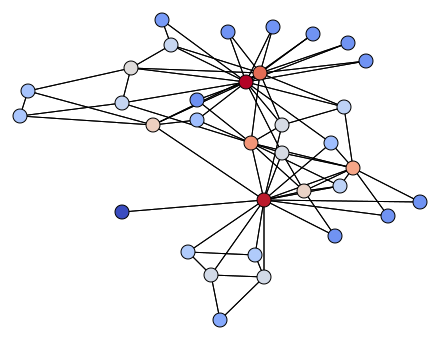

In [46]:
image = svg_graph(adjacency, position, scores=np.log(scores))

SVG(image)

We can see that the pagerank Algorithm is measuring the importance of the web_page based on the number of other web_pages pointing to that page

## ====================================================================

___

## Image Compression Using (SVD):
___
### Using the SVD factorization of a matrix to compress an image:
* the Singular value decomposition is a way of factorizing a matrix A into three multiplied matrices:
    * (U) An orthonormal matrix with represents the eigenvectors matrix of (AA.T)
    * (S) which represents the Eigenvalues of eigenvectors. 
    * (V.T) An orthonormal matrix with represents the transpose of the eigenvectors matrix of (A.TA)
* We can use this property to compress the image which is represented as a matrix of three chanels (R,G,B), by taking only the wanted low rankes of the SVD matrix.
* After each compression we can calculate the dimensions of the compressed image -which should be the same as the original image- 
* Also we can get the compression ratio between compressed and original image
___

### Implementing the code:

 ================== some info. about the original image ==================
Image dimensions:  (782, 960)
Image size= 1398.233 Kb


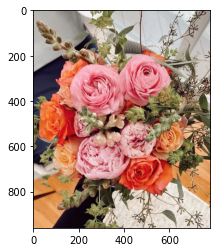

=================== The image after converting to the gray_Scale =================== 


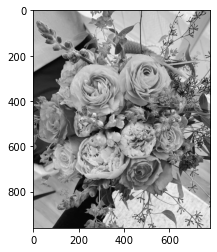

Gray_channel Image size= 123.964 Kb
The rank of Image matrix=  782
#The image after compression using 10 ranked matrix
1) compressed Image dimensions:  (782, 960)
2) Image size= 69.594 Kb
3) compression ratio (Original_size/compressed_size) =  1.781245509670374


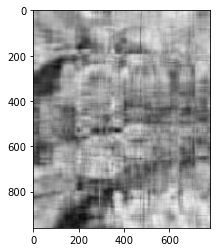

#The image after compression using 30 ranked matrix
1) compressed Image dimensions:  (782, 960)
2) Image size= 98.796 Kb
3) compression ratio (Original_size/compressed_size) =  1.2547471557552936


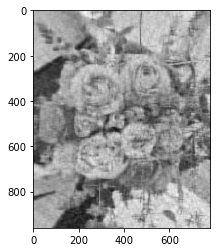

#The image after compression using 100 ranked matrix
1) compressed Image dimensions:  (782, 960)
2) Image size= 133.398 Kb
3) compression ratio (Original_size/compressed_size) =  0.9292792995397232


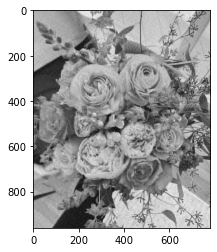

In [50]:
# Importing required matrices
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# ======================= Step 1 ======================= 
# --------- Loading the image into an PIL.Image object ---------
path = 'test.jpg'
orgnl_img = Image.open(path)

# ----------- Geting some information about the images ------------
print(' ================== some info. about the original image ==================')
print('Image dimensions: ', orgnl_img.size)
s = float(os.path.getsize(path))/1000
print(f'Image size= {s} Kb')

# ---------------- Displaying the image ----------------
plt.imshow(orgnl_img)
plt.show()
plt.figure()

# --------------- Converting the image into a gray_scale mode --------------
image_gray = orgnl_img.convert('LA')
plt.imshow(image_gray)
print('=================== The image after converting to the gray_Scale =================== ')
plt.show()

# ======================= Step 2 ======================= 
# ------------ reading the content of the image as a np.matrix ------------
img_arr = np.array(list(image_gray.getdata(band=0)), float)
img_arr = np.reshape(img_arr,(image_gray.size[1],image_gray.size[0]))
img_matrix = np.matrix(img_arr)
result_gray = Image.fromarray((img_matrix).astype(np.uint8))
result_gray.save('compressed_gray.jpg')
path_gray = 'compressed_gray.jpg'
s_gray = float(os.path.getsize(path_gray))/1000
print(f'Gray_channel Image size= {s_gray} Kb')


# ------------ Calculating the rank of the matrix ------------
rank = np.linalg.matrix_rank(img_matrix)
print('=================================================')
print('The rank of Image matrix= ' ,rank)

# ======================= Step 3 ======================= 

# ------------ Using A=USV.T as the low rank matrix approximation ------------
U, S, V = np.linalg.svd(img_matrix)

for i in [10, 30, 100]:
    print('===============================================================')
    
    # ------------ Generating the image as a sum of low_ranked Matrices ------------
    compressed = np.matrix(U[:,:i]*np.diag(S[:i])*np.matrix(V[:i,:]))
    
    # ------------ Writing some proberties of the compresed image ------------
    print(f'#The image after compression using {i} ranked matrix')
    
    # Saving the resulted compressed image into the device ------------
    result = Image.fromarray((compressed ).astype(np.uint8))
    result.save(f'compressed{i}.jpg')
    path_compreses = f'compressed{i}.jpg'
    
    # Calculating the compression ratio ------------
    s_com = float(os.path.getsize(path_compreses))/1000
    compres = Image.open(path_compreses)
    print('1) compressed Image dimensions: ', compres.size)
    print(f'2) Image size= {s_com} Kb')
    print('3) compression ratio (Original_size/compressed_size) = ', s_gray/s_com)
    
    # ------------ Showing the resulted image ------------
    plt.imshow(compressed, cmap='gray')
    plt.show()

## ====================================================================

___
## Eigen_Faces Using PCA: 

In [12]:
%matplotlib inline


The eigenfaces example: chaining PCA and SVMs
=============================================

The goal of this example is to show how an unsupervised method and a
supervised one can be chained for better prediction. It starts with a
didactic but lengthy way of doing things, and finishes with the
idiomatic approach to pipelining in scikit-learn.

Here we'll take a look at a simple facial recognition example. Ideally,
we would use a dataset consisting of a subset of the `Labeled Faces in
the Wild <http://vis-www.cs.umass.edu/lfw/>`__ data that is available
with :func:`sklearn.datasets.fetch_lfw_people`. However, this is a
relatively large download (~200MB) so we will do the tutorial on a
simpler, less rich dataset. Feel free to explore the LFW dataset.



In [13]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

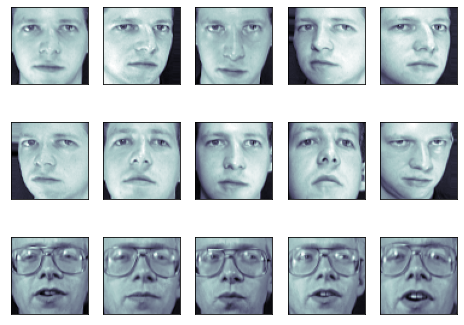

In [14]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


Preprocessing: Principal Component Analysis
-------------------------------------------

1850 dimensions is a lot for SVM. We can use PCA to reduce these 1850
features to a manageable size, while maintaining most of the information
in the dataset.



In [17]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

In [18]:
print(pca)

PCA(n_components=150, whiten=True)


___
## Implementing the PCA algorithm onto X_train Data and finding the first 150 eigenbases

In [19]:
import numpy as np
# ========================= Step (1) =========================
def standerize(column):
    mean_column = np.sum(column,axis=0)/column.shape[0]
    std_column = np.std(column)
    z = (column-mean_column)/(std_column)
    return z

# ========================= Step (2) =========================
standerized = np.zeros((X_train.shape[0],X_train.shape[1]))
for i in range(X_train.shape[1]):
    z = standerize(X_train[0:,i])
    standerized[0:,i] = z
# ========================= Step (3) =========================
covariance = np.dot(standerized.T,standerized)/X_train.shape[0]
# ========================= Step (4) =========================
eigenValues, eigenVectors = np.linalg.eig(covariance)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
# ========================= Step (5) =========================
picked = eigenVectors[0:,0:150]

transformed = standerized@picked


In [20]:
print(transformed)

[[-10.05457085+0.j  -9.67818536+0.j -38.21033984+0.j ...   1.06375055+0.j
    1.48102992+0.j   0.18008031+0.j]
 [ 26.81762193+0.j  21.76825592+0.j   0.23155557+0.j ...  -1.89624268+0.j
   -0.24760214+0.j   0.12378542+0.j]
 [  8.25781577+0.j -27.00054501+0.j   4.85659492+0.j ...   2.01675673+0.j
    0.66752143+0.j  -2.05034944+0.j]
 ...
 [ 24.6217085 +0.j -12.06254062+0.j -35.15783424+0.j ...  -0.42916044+0.j
   -0.40656739+0.j  -0.9934878 +0.j]
 [ 15.85594635+0.j  24.24395264+0.j -17.90055265+0.j ...   0.65587886+0.j
   -0.69218862+0.j  -0.86157499+0.j]
 [ 32.58081072+0.j  13.06969541+0.j   4.32383455+0.j ...  -0.85966215+0.j
   -3.21149845+0.j   0.38815981+0.j]]


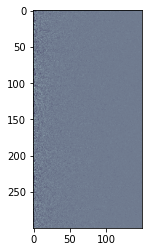

In [21]:
plt.imshow(transformed.real,cmap=plt.cm.bone)

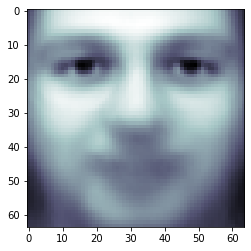

In [22]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.bone)

In [23]:
print(pca.components_.shape)

(150, 4096)


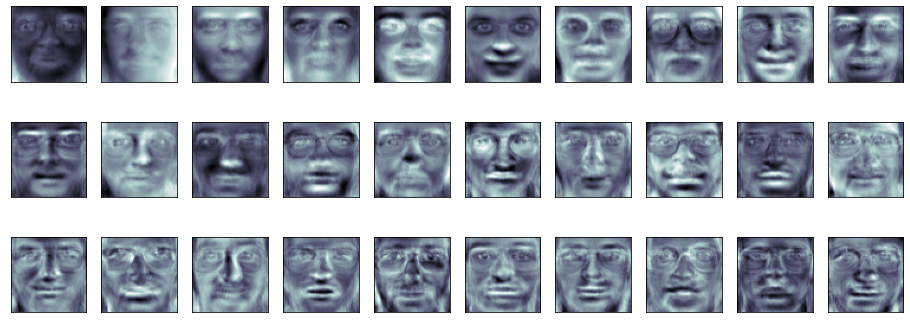

In [24]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

In [25]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [26]:
print(X_test_pca.shape)

(100, 150)


These projected components correspond to factors in a linear combination
of component images such that the combination approaches the original
face.

Doing the Learning: Support Vector Machines
-------------------------------------------

Now we'll perform support-vector-machine classification on this reduced
dataset:



In [27]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.001)

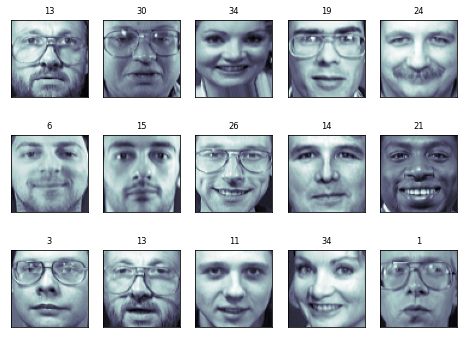

In [28]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

In [29]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         1
           4       0.33      1.00      0.50         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         4
          20       1.00    

In [30]:
print(metrics.confusion_matrix(y_test, y_pred))

[[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


In [31]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),
                ('svm', svm.LinearSVC(C=1.0))])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[5 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
